In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:
end = datetime.now()
start = datetime(end.year - 15, end.month, end.day)
stock = "BTC-USD"
stock_data = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [4]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-02-07,96529.085938,100154.140625,95653.882812,96581.320312,55741290456
2025-02-08,96482.453125,96877.804688,95702.492188,96533.257812,22447526395
2025-02-09,96500.093750,97325.281250,94745.257812,96481.312500,27732901800
2025-02-10,97437.554688,98333.218750,95320.843750,96499.460938,40078962391
2025-02-11,96493.453125,98464.125000,96493.453125,97443.085938,30255837184


In [7]:
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3801.000000,3801.000000,3801.000000,3801.000000,3.801000e+03
mean,20467.585583,20901.296346,19967.239418,20443.603472,1.896138e+10
std,23535.493705,24016.887210,22983.972258,23507.264370,2.071692e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,1272.829956,1279.400024,1250.709961,1267.469971,5.101990e+08
50%,9480.254883,9665.849609,9274.295898,9480.735352,1.490681e+10
75%,32569.849609,33858.312500,31215.492188,32515.714844,3.018029e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3801 entries, 2014-09-17 to 2025-02-11
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3801 non-null   float64
 1   (High, BTC-USD)    3801 non-null   float64
 2   (Low, BTC-USD)     3801 non-null   float64
 3   (Open, BTC-USD)    3801 non-null   float64
 4   (Volume, BTC-USD)  3801 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 178.2 KB


In [11]:
stock_data.isnull()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,False,False,False,False,False
2014-09-18,False,False,False,False,False
2014-09-19,False,False,False,False,False
2014-09-20,False,False,False,False,False
2014-09-21,False,False,False,False,False
...,...,...,...,...,...
2025-02-07,False,False,False,False,False
2025-02-08,False,False,False,False,False


In [13]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [14]:
#Close price data
closing_price = stock_data[['Close']]

In [16]:
closing_price['Close']

Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-02-07,96529.085938
2025-02-08,96482.453125
2025-02-09,96500.093750


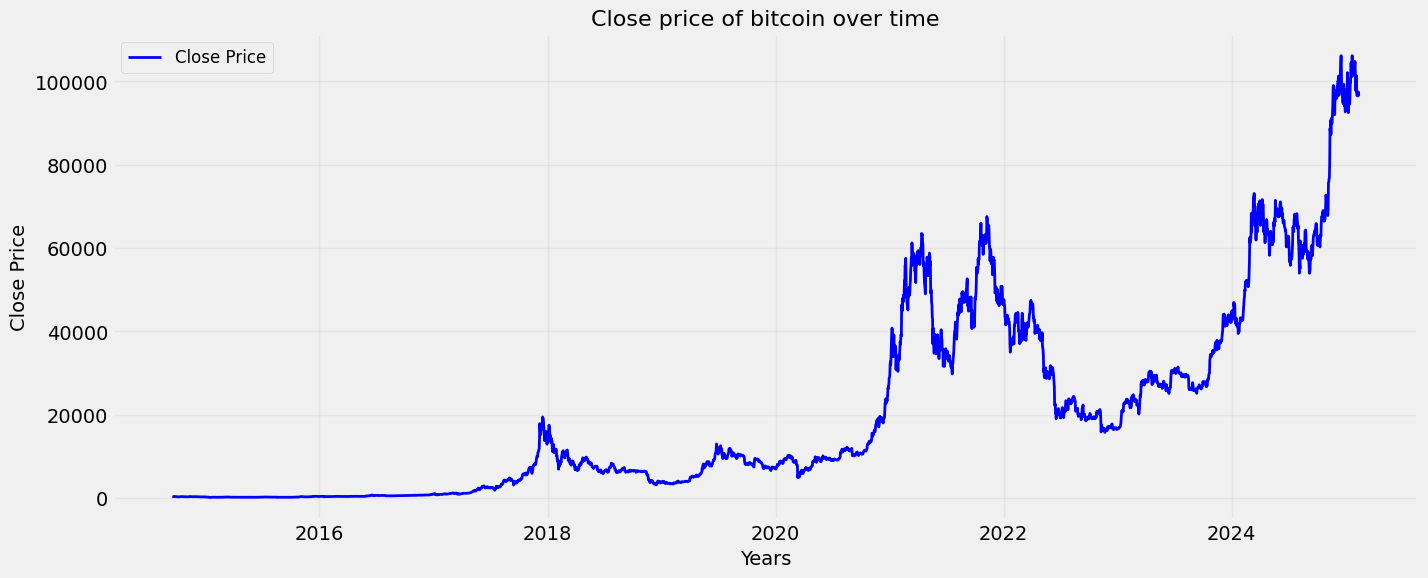

In [25]:
#Plot closing price with enhacement
plt.figure(figsize=(15,6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth = 2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Close Price", fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [28]:
# Moving Average
temp_data = [10,20,30,40,50,60,70,80,90]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [29]:
df1 = pd.DataFrame(temp_data)

In [30]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [62]:
for i in range(2014, 2025):
  print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [67]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

<ipython-input-67-63837559cb05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
<ipython-input-67-63837559cb05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


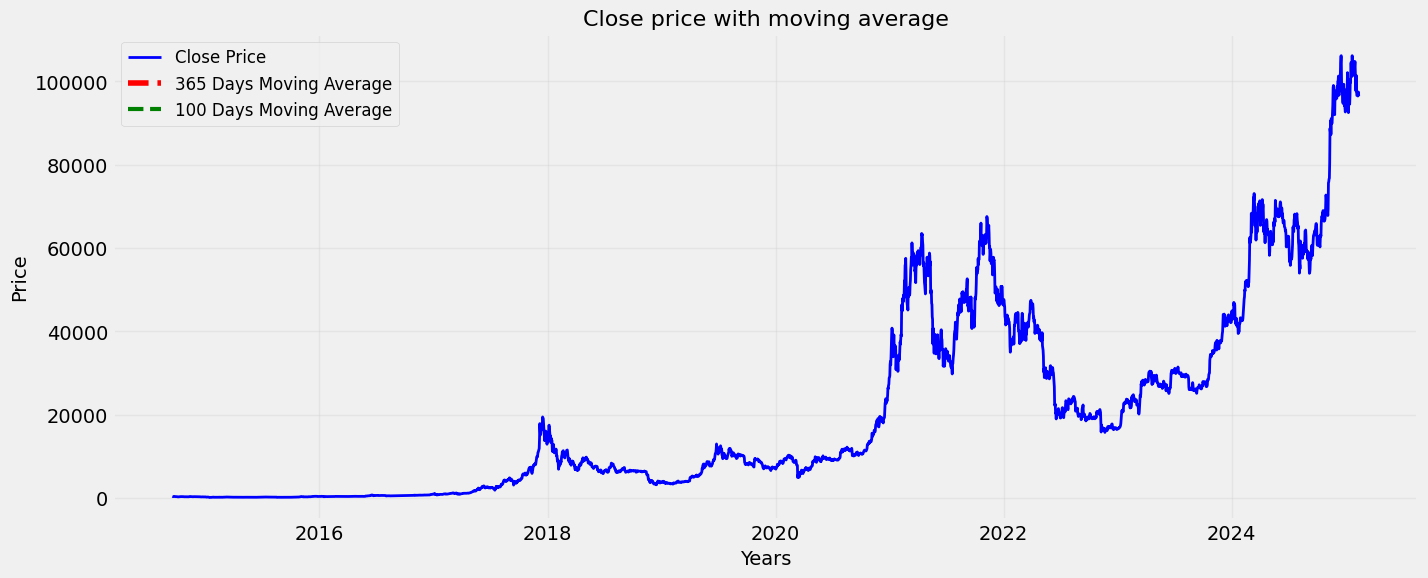

In [86]:
#Plot closing price with enhacement
plt.figure(figsize=(15,6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth = 2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle = '--', linewidth = 4)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green', linestyle = '--', linewidth = 3)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [70]:
# LSTM -> Long Short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [71]:
scaled_data

array([[0.00263505],
       [0.00232463],
       [0.00204489],
       ...,
       [0.90897104],
       [0.91781767],
       [0.90890837]])

In [73]:
len(scaled_data)

3801

In [76]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [77]:
#prepare data for LSTM
x_data = []
y_data = []
base_days = 100
for i in range(base_days, len(scaled_data)):
  x_data.append(scaled_data[i-base_days:i])
  y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)


In [78]:
# Split inti train and test data
train_size = int(len(x_data) * 0.9)
x_train = x_data[:train_size]
y_train = y_data[:train_size]
x_test = x_data[train_size:]
y_test = y_data[train_size:]

In [79]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 57s 85ms/step - loss: 8.5050e-05
Epoch 2/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - loss: 9.9909e-05
Epoch 3/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - loss: 8.7432e-05
Epoch 4/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - loss: 8.2085e-05
Epoch 5/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 56s 85ms/step - loss: 7.7380e-05
Epoch 6/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 84s 88ms/step - loss: 8.1706e-05
Epoch 7/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 56s 85ms/step - loss: 8.9014e-05
Epoch 8/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - loss: 8.3597e-05
Epoch 9/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - loss: 8.3225e-05
Epoch 10/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - loss: 7.2202e-05


In [91]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


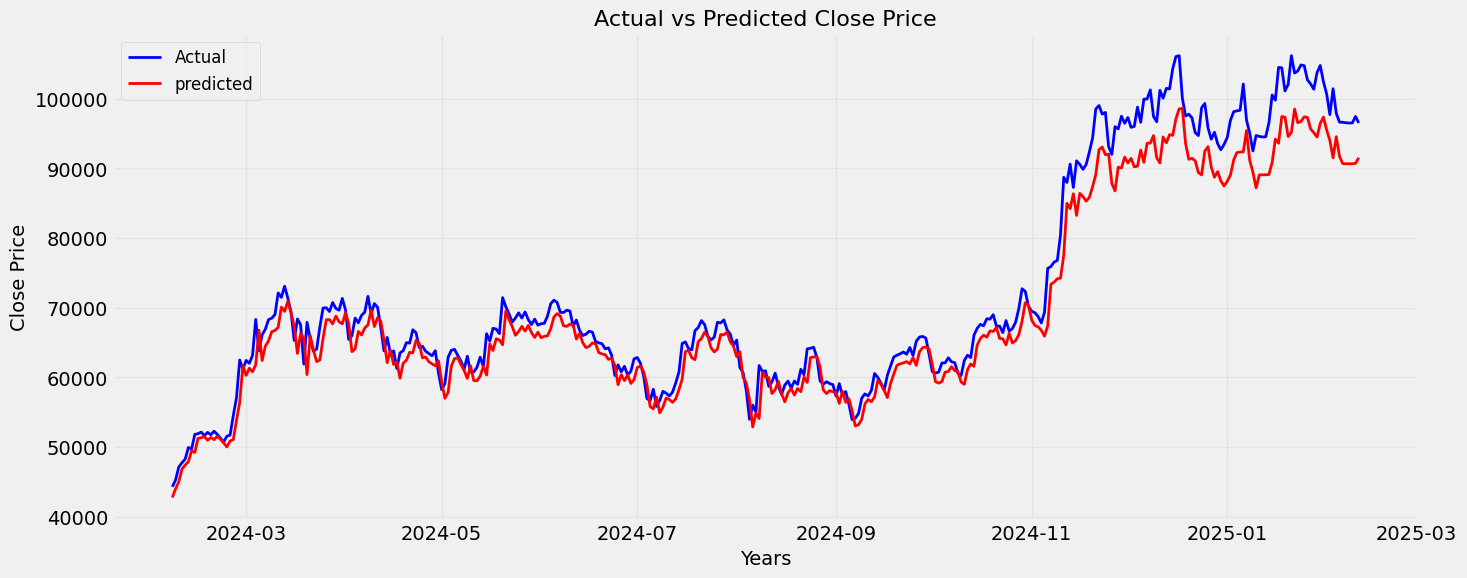

In [92]:
plotting_data = pd.DataFrame(
    {
        'Actual': inv_y_test.flatten(),
        'Predicted': inv_predictions.flatten()
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize=(15,6))
plt.plot(plotting_data.index, plotting_data['Actual'], label = 'Actual', color = 'blue', linewidth = 2)
plt.plot(plotting_data.index, plotting_data['Predicted'], label = 'predicted', color = 'red', linewidth = 2) # Changed 'predicted' to 'Predicted'

plt.title("Actual vs Predicted Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Close Price", fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()


In [94]:
# predict future days
last_100 = scaled_data[-100:].reshape(1, -1, 1)

# Initialize future_predictions as an empty list
future_predictions = []

for  _ in range(10):
  next_days  = model.predict(last_100)
  future_predictions.append(scaler.inverse_transform(next_days))
  last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [96]:
future_predictions

[array([[90742.625]], dtype=float32),
 array([[85857.32]], dtype=float32),
 array([[81502.47]], dtype=float32),
 array([[77589.164]], dtype=float32),
 array([[74108.805]], dtype=float32),
 array([[71035.84]], dtype=float32),
 array([[68333.52]], dtype=float32),
 array([[65962.5]], dtype=float32),
 array([[63884.02]], dtype=float32),
 array([[62061.023]], dtype=float32)]

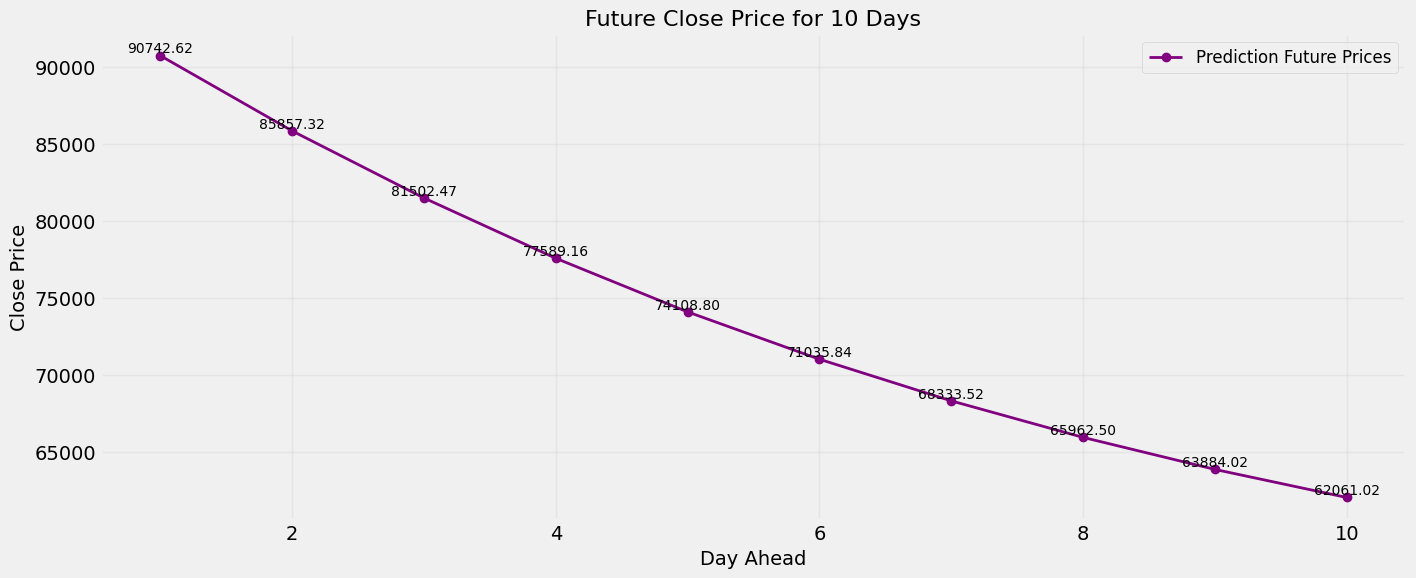

In [98]:
future_predictions = np.array(future_predictions).flatten()


plt.figure(figsize=(15,6))
plt.plot(range(1, 11), future_predictions, marker = 'o' ,label = 'Prediction Future Prices', color = 'purple', linewidth = 2)


for i, val in enumerate(future_predictions):
  plt.text(i+1, val, f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color = 'black')


plt.title("Future Close Price for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel("Close Price", fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [99]:
model.save("model.keras")